# Performance Analysis

All our agents save important performance measures such as **rewards** and
e.g. the **number of coins** collected each round in a numpy array. In this
notebook, we analyze the performance of our agents.

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
def movingaverage(interval, window_size):
    window = np.ones(int(window_size)) / float(window_size)
    return np.convolve(interval, window, 'same')

## `coin_agent`

In [28]:
rewards_coin_agent = np.load("agent_code/coin_agent/rewards.npy")
performance_coin_agent = np.load("agent_code/coin_agent/performance.npy")

In [29]:
generation = np.arange(rewards_coin_agent.shape[0]) + 1

In [30]:
window_size = 10
mean_reward =  rewards_coin_agent[:, 0]
reward_average = movingaverage(mean_reward, window_size)

median_reward =  rewards_coin_agent[:, 1]
reward_std =  rewards_coin_agent[:, 2]
sum_reward =  rewards_coin_agent[:, 3]

In [31]:
steps_survived, coins_collected = performance_coin_agent.T

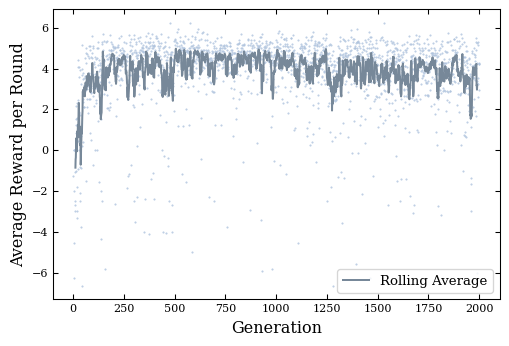

In [32]:
fig, ax = plt.subplots(dpi=96)

ax.set_xlabel("Generation")
ax.set_ylabel("Average Reward per Round")

ax.plot(generation, mean_reward, ".", markersize=1, color="lightsteelblue")
ax.plot(
    generation[window_size:-window_size],
    reward_average[window_size:-window_size],
    label="Rolling Average", color="lightslategray"
)
ax.legend()
plt.savefig("figs/coin_agent_rewards.pdf", bbox_inches='tight', dpi=120)

**Additional performance metrics:**

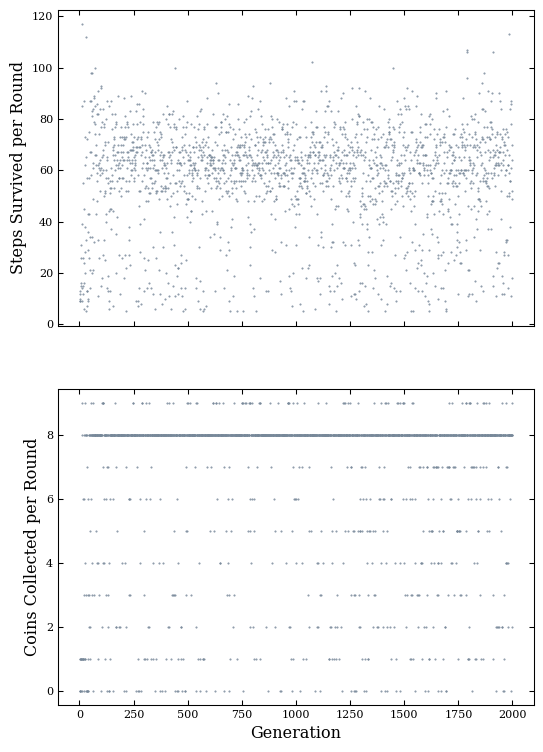

In [33]:
fig, ax = plt.subplots(nrows=2, figsize=(1 * 6.4, 2 * 4.8), dpi=96, sharex=True)

ax[1].set_xlabel("Generation")
ax[0].set_ylabel("Steps Survived per Round")
ax[1].set_ylabel("Coins Collected per Round")

ax[0].plot(generation, steps_survived, ".", markersize=1, color="lightslategray")
ax[1].plot(generation, coins_collected, ".", markersize=1, color="lightslategray")

plt.savefig("figs/coin_agent_performance.pdf", bbox_inches='tight', dpi=120)